<ipython-input-2-ff7682ccc737>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["English", "Turkish"], y=[avg_english_WER, avg_turkish_WER], palette=["blue", "red"])


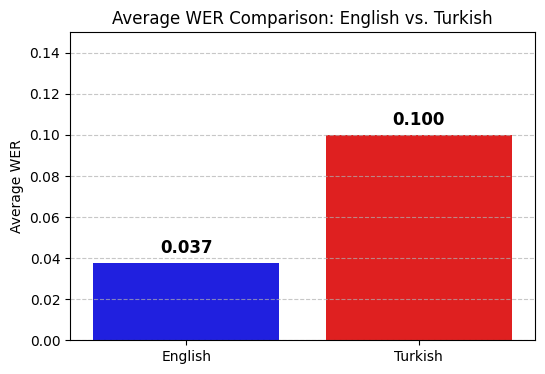

Average WER for English Podcasts: 0.037
Average WER for Turkish Podcasts: 0.100


In [ ]:

!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Podcast episodes and their corresponding WER
podcast_WER = {
    "podcast_1": 0.01,  # English
    "podcast_2": 0.08,  # Turkish
    "podcast_3": 0.02,  # English
    "podcast_4": 0.04,  # Turkish
    "podcast_5": 0.08,  # English
    "podcast_6": 0.14,  # Turkish
    "podcast_7": 0.04,  # English
    "podcast_8": 0.14   # Turkish
}

# Episodes by language
english_WER = [wer for key, wer in podcast_WER.items() if "podcast_" + key[-1] in ["podcast_1", "podcast_3", "podcast_5", "podcast_7"]]
turkish_WER = [wer for key, wer in podcast_WER.items() if "podcast_" + key[-1] in ["podcast_2", "podcast_4", "podcast_6", "podcast_8"]]

# Average WER for English and Turkish
avg_english_WER = np.mean(english_WER)
avg_turkish_WER = np.mean(turkish_WER)

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=["English", "Turkish"], y=[avg_english_WER, avg_turkish_WER], palette=["blue", "red"])

# Labels and title
plt.ylabel("Average WER")
plt.title("Average WER Comparison: English vs. Turkish")
plt.ylim(0, 0.15)  # Set y-axis range for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.7)

# WER values on top of bars
for i, value in enumerate([avg_english_WER, avg_turkish_WER]):
    plt.text(i, value + 0.005, f"{value:.3f}", ha='center', fontsize=12, fontweight="bold")


plt.show()


print(f"Average WER for English Podcasts: {avg_english_WER:.3f}")
print(f"Average WER for Turkish Podcasts: {avg_turkish_WER:.3f}")


<ipython-input-2-2cbc5f0c8724>:17: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'black'}` instead.

  ax = sns.barplot(x="Genre", y="mean", hue="Language", data=df_grouped,


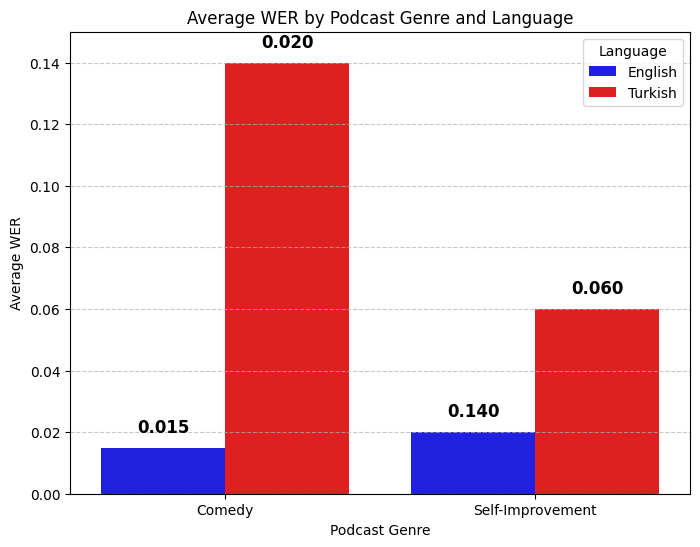

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    "Genre": ["Comedy", "Comedy", "Self-Improvement", "Self-Improvement"],
    "Language": ["English", "Turkish", "English", "Turkish"],
    "WER": [0.015, 0.140, 0.020, 0.060]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))

df_grouped = df.groupby(["Genre", "Language"])["WER"].agg(["mean", "std"]).reset_index()

ax = sns.barplot(x="Genre", y="mean", hue="Language", data=df_grouped,
                 palette={"English": "blue", "Turkish": "red"}, capsize=0.1, errcolor="black")

for bar, (index, row) in zip(ax.patches, df_grouped.iterrows()):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f"{row['mean']:.3f}",
        ha='center',
        fontsize=12,
        fontweight="bold",
        color="black"
    )

# Labels and title
plt.xlabel("Podcast Genre")
plt.ylabel("Average WER")
plt.title("Average WER by Podcast Genre and Language")
plt.ylim(0, 0.15)
plt.legend(title="Language", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
